------------------------------
#### understanding covariances
------------------------

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

#### Co-variance

In [2]:
# Two variables
X = np.array([1, 2, 3, 4, 5])
Y = np.array([5, 4, 3, 2, 1])

In [3]:
# Calculate means
mean_X = np.mean(X)
mean_Y = np.mean(Y)

In [4]:
# Calculate deviations from means
deviations_X = X - mean_X
deviations_Y = Y - mean_Y

In [5]:
# Calculate covariance
covariance = np.mean(deviations_X * deviations_Y)

In [6]:
print("Variable X:", X)
print("Variable Y:", Y)
print("Mean of X:", mean_X)
print("Mean of Y:", mean_Y)
print("Deviations of X:", deviations_X)
print("Deviations of Y:", deviations_Y)
print("Covariance:", covariance)

Variable X: [1 2 3 4 5]
Variable Y: [5 4 3 2 1]
Mean of X: 3.0
Mean of Y: 3.0
Deviations of X: [-2. -1.  0.  1.  2.]
Deviations of Y: [ 2.  1.  0. -1. -2.]
Covariance: -2.0


#### Geometric intuition - COV

In [7]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
# Set random seed for reproducibility
np.random.seed(42)

In [9]:
# Generate random data
n_samples = 50
mean = [0, 0]  # Mean of both variables

cov_positive = [[1,   0.8], 
                [0.8, 1]]    # Positive covariance matrix

cov_negative = [[1,   -0.8], 
                [-0.8, 1]]  # Negative covariance matrix

cov_zero = [[1, 0], [0, 1]]            # Zero covariance matrix

In [10]:
# Generate data for each scenario
data_positive = np.random.multivariate_normal(mean, cov_positive, n_samples)
data_negative = np.random.multivariate_normal(mean, cov_negative, n_samples)
data_zero     = np.random.multivariate_normal(mean, cov_zero, n_samples)

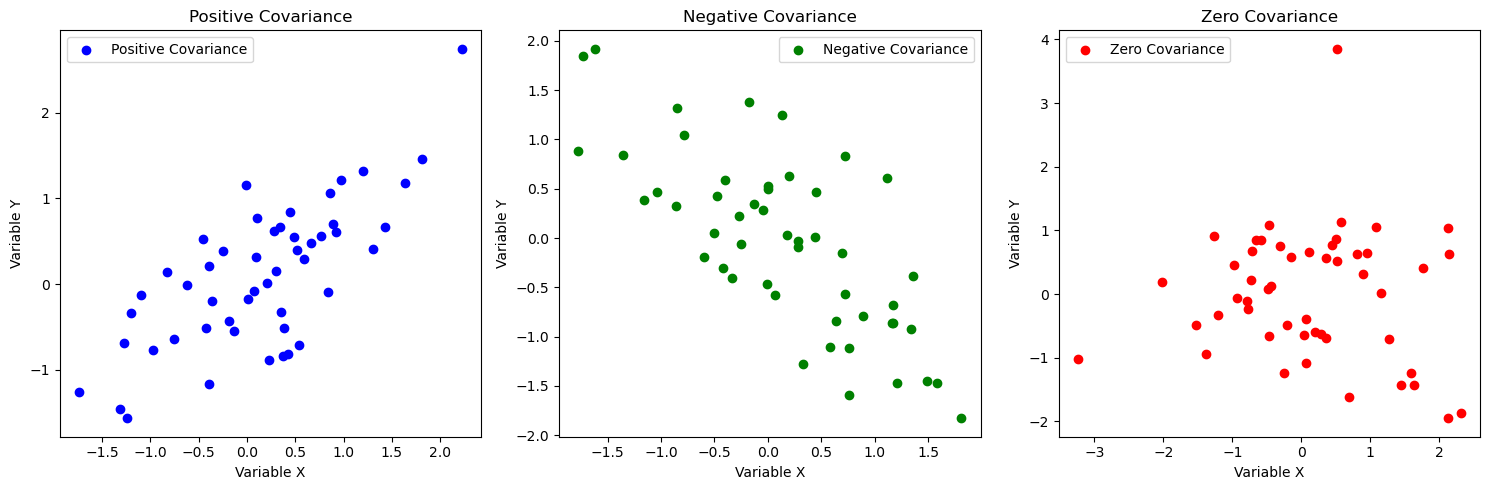

In [11]:
# Create scatter plots for each scenario
plt.figure(figsize=(15, 5))

plt.subplot(131)
plt.scatter(data_positive[:, 0], data_positive[:, 1], c='blue', label='Positive Covariance')
plt.xlabel('Variable X')
plt.ylabel('Variable Y')
plt.title('Positive Covariance')
plt.legend()

plt.subplot(132)
plt.scatter(data_negative[:, 0], data_negative[:, 1], c='green', label='Negative Covariance')
plt.xlabel('Variable X')
plt.ylabel('Variable Y')
plt.title('Negative Covariance')
plt.legend()

plt.subplot(133)
plt.scatter(data_zero[:, 0], data_zero[:, 1], c='red', label='Zero Covariance')
plt.xlabel('Variable X')
plt.ylabel('Variable Y')
plt.title('Zero Covariance')
plt.legend()

plt.tight_layout()

**Example - Geometric intuition on COV**

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [14]:
# negative COV
data = np.array([[18,   5],
                 [15,   11],
                 [11,   13],
                 [10,   16],
                 [8,    14], 
                 [5.5,  16]])

# positive COV
# data = np.array([[5, 8],
#                  [7, 11],
#                  [11, 13],
#                  [16, 16],
#                  [18, 24], 
#                  [23, 36]])

# No COV
# data = np.array([[5, 5],
                 # [7, 6.7],
                 # [11, 6.1],
                 # [16, 5.6],
                 # [18, 5.1], 
                 # [23, 6]])


In [15]:
data

array([[18. ,  5. ],
       [15. , 11. ],
       [11. , 13. ],
       [10. , 16. ],
       [ 8. , 14. ],
       [ 5.5, 16. ]])

In [16]:
np.mean(data[:, 0]), np.mean(data[:, 1])

(11.25, 12.5)

In [17]:
x_bar = np.round(np.mean(data[:, 0]), 4)
y_bar = np.round(np.mean(data[:, 1]), 4)

In [18]:
x_bar, y_bar

(11.25, 12.5)

In [19]:
df = pd.DataFrame(data, columns=['x1', 'x2'])
df

,x1,x2
0,18.0,5.0
1,15.0,11.0
2,11.0,13.0
3,10.0,16.0
4,8.0,14.0
5,5.5,16.0


In [20]:
df['x1-mean'] = df.x1 - x_bar
df['x2-mean'] = df.x2 - y_bar
df

,x1,x2,x1-mean,x2-mean
0,18.0,5.0,6.75,-7.5
1,15.0,11.0,3.75,-1.5
2,11.0,13.0,-0.25,0.5
3,10.0,16.0,-1.25,3.5
4,8.0,14.0,-3.25,1.5
5,5.5,16.0,-5.75,3.5


In [21]:
df['x1x2']    = (df.x1 - x_bar) * (df.x2 - y_bar)
df

,x1,x2,x1-mean,x2-mean,x1x2
0,18.0,5.0,6.75,-7.5,-50.625
1,15.0,11.0,3.75,-1.5,-5.625
2,11.0,13.0,-0.25,0.5,-0.125
3,10.0,16.0,-1.25,3.5,-4.375
4,8.0,14.0,-3.25,1.5,-4.875
5,5.5,16.0,-5.75,3.5,-20.125


In [22]:
np.sum(df.x1x2)/(df.shape[0]-1)

-17.15

In [23]:
from matplotlib.patches import Rectangle

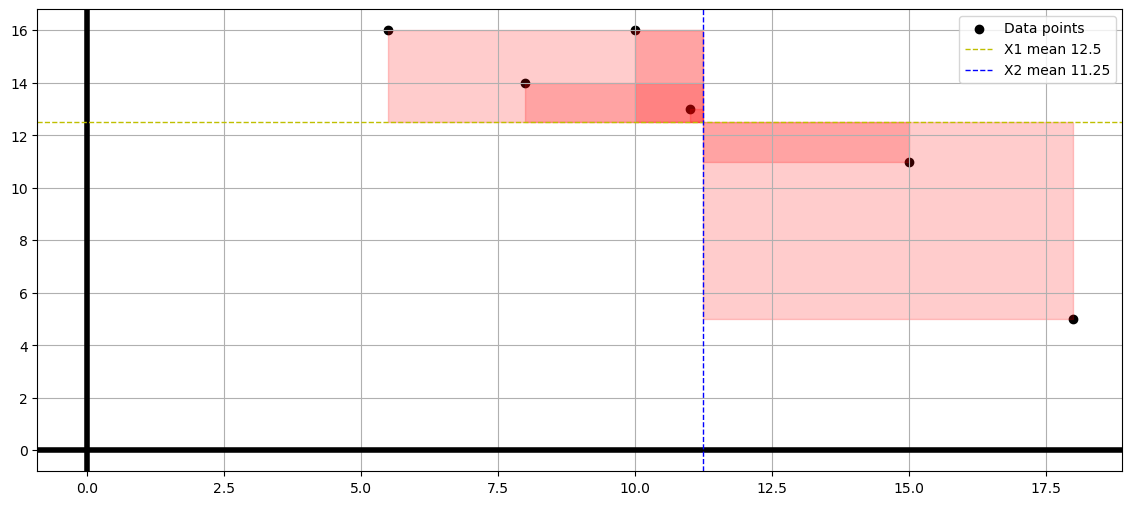

In [24]:
plt.figure(figsize=(14, 6))

ax = plt.gca()
plt.grid()

ax.axhline(linewidth=4, color='k')
ax.axvline(linewidth=4, color='k')

# plot the random number
ax.scatter(data[:, 0], data[:, 1], c='k', label='Data points')

ax.axhline(y= y_bar, linewidth=1, color='y', linestyle="--", label = 'X1 mean {}'.format((y_bar)))
ax.axvline(x= x_bar, linewidth=1, color='b', linestyle="--", label = 'X2 mean {}'.format((x_bar)))

# read all the data points
for idx, row in df.iterrows():
    someX, someY = row.x1, row.x2
    
    dist_x_bar  = someX - x_bar
    dist_y_bar  = someY - y_bar
    
    # positive or negative relation
    if dist_x_bar * dist_y_bar < 0:
        fill_color = ['red']
        ax.add_patch(Rectangle((someX , someY ), -dist_x_bar, -dist_y_bar, color='r', alpha=.2))
    else:
        fill_color = ['green']
        ax.add_patch(Rectangle((someX , someY ), -dist_x_bar, -dist_y_bar, color='g', alpha=.2))
            
ax.legend();